In [4]:
# import h5py
import config
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import random
import time

**Logistic Regression**

In [5]:
train_loss_LR =  [0.23512570962309837, 0.20294092439115047, 0.21205555561929942, 0.19876199536025524, 0.22686477035284042, 0.19721506655216217, 0.2071246651187539, 0.19340644903481008, 0.17439851615577937, 0.18865043051540853, 0.1866150541231036, 0.17270005438476801, 0.15980910506099463, 0.1933511955291033, 0.15715007875114678, 0.1658403044566512, 0.15043691284954547, 0.16568014290183783, 0.1795719574019313, 0.16133013386279343, 0.16286688666790725, 0.17656355682760477, 0.1434565806388855, 0.15748882815241813, 0.14413559805601836, 0.15313104812055825, 0.1482815507054329, 0.15738511338829994, 0.13937693249434233, 0.1292872413620353, 0.1474717577919364, 0.16317601256072523, 0.13969381395727395, 0.14318700399249792, 0.1297141832113266, 0.13249966263771057, 0.14058713510632515, 0.1453674929589033, 0.13702346630394457, 0.1427485194429755, 0.14070934418588876, 0.12891009099781514, 0.13302060540765523, 0.14376855481415987, 0.13084601391106843]

test_loss_LR =  [0.06949776355177165, 0.06753847822546959, 0.06692868713289499, 0.06440505180507898, 0.06783747751265765, 0.06496345490217209, 0.06518997900187969, 0.06458373583853244, 0.06475954223424196, 0.06559458512812853, 0.0617400785535574, 0.0627549771592021, 0.06107194036245346, 0.06261691387742757, 0.06174181401729584, 0.060468944646418096, 0.060962548032402995, 0.05975650995969772, 0.060498690009117125, 0.060429408438503744, 0.05909698210656643, 0.05954259667545557, 0.059099344834685326, 0.05835495341569185, 0.059335376769304275, 0.058276913836598394, 0.05705738060176373, 0.05822444207966328, 0.05793120063841343, 0.05887547545135021, 0.056989277563989166, 0.057966325357556345, 0.05686028921976685, 0.05725645825266838, 0.05824381396174431, 0.05696901746094227, 0.05700434993952513, 0.05580285035073757, 0.05632610660046339, 0.057457185126841066, 0.056403261572122575, 0.05727415181696415, 0.056588126718997954, 0.05518024979159236, 0.05675898367539048]


In [8]:
def ProducePlot(first_data, second_data, first_label, second_label, y_label, x_label, title, up=1):
    plt.figure(figsize=(10, 8))
    p1 = plt.plot(first_data)
    p2 = plt.plot(second_data)
    plt.ylim(0, 0.5)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.yticks(np.arange(0, up, 0.1))
    plt.legend((first_label, second_label))
    plt.title(title)
    plt.show()

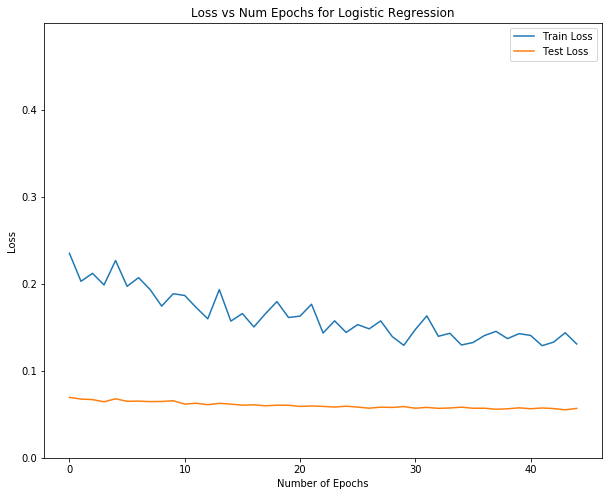

In [19]:
ProducePlot(train_loss_LR, test_loss_LR, 'Train Loss', 'Test Loss', 'Loss', 'Number of Epochs', 'Loss vs Num Epochs for Logistic Regression', up=0.5)

In [12]:
auc_prepayment = [0.51996898,
 0.53109927,
 0.53337547,
 0.54117947,
 0.53378316,
 0.5413946 ,
 0.5402476 ,
 0.5436934 ,
 0.55300616,
 0.54821451,
 0.54787431,
 0.5565778 ,
 0.55084454,
 0.56006638,
 0.55313878,
 0.55794744,
 0.55998767,
 0.56160355,
 0.56212255,
 0.56293462,
 0.56330873,
 0.55980727,
 0.56795996,
 0.5629423 ,
 0.57092126,
 0.57026958,
 0.55742682,
 0.57124014,
 0.57033643,
 0.57312322,
 0.56805203,
 0.56578878,
 0.56632952,
 0.57743067,
 0.57234405,
 0.58147161,
 0.57125189,
 0.56447452,
 0.56929213,
 0.56886991,
 0.57665507,
 0.57687253,
 0.56388232,
 0.56542778,
 0.57315511]


In [11]:
auc_30d = [0.54777099,
 0.54882515,
 0.55828898,
 0.55787415,
 0.55759498,
 0.560575  ,
 0.56438462,
 0.56527227,
 0.5659597 ,
 0.57540628,
 0.57117563,
 0.57016118,
 0.57308617,
 0.57452444,
 0.57872969,
 0.5808181 ,
 0.58007365,
 0.58390003,
 0.59704703,
 0.58472632,
 0.58435951,
 0.59069662,
 0.60247703,
 0.59973678,
 0.59776917,
 0.60835645,
 0.60165771,
 0.59864791,
 0.5960123 ,
 0.60612654,
 0.60894817,
 0.61258835,
 0.60799642,
 0.61488884,
 0.60631458,
 0.60909822,
 0.61842846,
 0.60895355,
 0.61161998,
 0.60595486,
 0.61314092,
 0.6015716 ,
 0.61011906,
 0.61154579,
 0.61560765]


In [13]:
training_auc_LR = [0.53338239,
 0.55781611,
 0.56437329,
 0.57323301,
 0.57752092,
 0.57939926,
 0.57745665,
 0.5858818 ,
 0.58774598,
 0.59220505,
 0.58930635,
 0.59032   ,
 0.59160487,
 0.59134364,
 0.58962638,
 0.59443306,
 0.60242732,
 0.60201776,
 0.6060899 ,
 0.59933427,
 0.60729713,
 0.60596802,
 0.61127146,
 0.60471854,
 0.60888627,
 0.6141421 ,
 0.61554391,
 0.61611608,
 0.61514934,
 0.6148594 ,
 0.60949138,
 0.61067878,
 0.61866927,
 0.62107658,
 0.6174442 ,
 0.6223662 ,
 0.61700634,
 0.62227005,
 0.62842736,
 0.61780909,
 0.62853488,
 0.61998578,
 0.62412167,
 0.6258503 ,
 0.6257427 ]


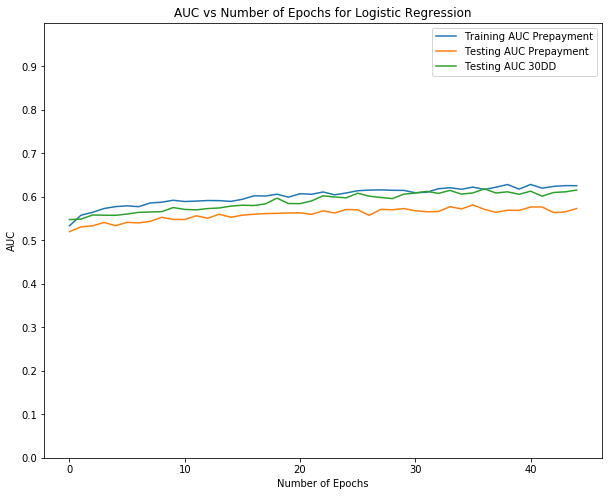

In [14]:
plt.figure(figsize=(10, 8))
p1 = plt.plot(training_auc_LR)
p2 = plt.plot(auc_prepayment)
p3 = plt.plot(auc_30d)
plt.ylim(0, 1)
plt.ylabel('AUC')
plt.xlabel('Number of Epochs')
plt.yticks(np.arange(0, 1, 0.1))
plt.legend(('Training AUC Prepayment', 'Testing AUC Prepayment', 'Testing AUC 30DD'))
plt.title('AUC vs Number of Epochs for Logistic Regression')
plt.show()

**Feed Forward**

In [15]:
ff_training_loss = [3.4999137043952944, 3.149667854309082, 2.9442093896865846, 2.767562918663025, 2.5554659390449523, 2.3488820362091065, 2.1878631329536438, 1.9945480906963349, 1.8509583580493927, 1.7035282242298126, 1.5211483430862427, 1.4001590967178346, 1.2687955683469772, 1.1144600003957748, 1.0226184225082398, 0.9149960082769394, 0.8176449817419053, 0.731291554570198, 0.6525117307901382, 0.5885916951298714, 0.5259060472249985, 0.47499375671148303, 0.43108545541763305, 0.3888267362117767, 0.35648068219423296, 0.3270290845632553, 0.31228129372000696, 0.27710691586136815, 0.26184068009257316, 0.24874859943985939, 0.23306188136339187, 0.21705994814634322, 0.2132865907251835, 0.19674365811049938, 0.19380652211606503, 0.17549157194793225, 0.17397523634135723, 0.1684107768535614, 0.17305414952337742, 0.16214691661298275, 0.1785307402908802, 0.1675634228438139, 0.1524878765642643, 0.15982678074389697, 0.14777409885078668, 0.15405462849885226, 0.1402563067525625, 0.14688950575888157, 0.14020655911415816, 0.14809234522283077, 0.13273153591901063, 0.14706830944865942, 0.1310850265622139, 0.13564966153353453, 0.13928618919104338, 0.1438067926838994, 0.14212457221001387, 0.13015771217644215, 0.13432452127337455, 0.13869981922209262, 0.12527128603309393, 0.1375489553809166, 0.1346464382484555, 0.13447575118392707, 0.1350111434608698]

ff_test_loss =  [3.4110728454589845, 3.179051718711853, 2.9788771295547485, 2.7849566459655763, 2.6008082675933837, 2.4145012855529786, 2.2378989839553833, 2.069210121631622, 1.8959195506572724, 1.7393319845199584, 1.5868643856048583, 1.4391813039779664, 1.3015476381778717, 1.177965167760849, 1.0548887681961059, 0.9441529268026352, 0.8404278630018234, 0.7493261861801147, 0.6718287831544876, 0.5926545429229736, 0.5319480699300766, 0.4684275677800179, 0.41377680510282516, 0.3678457179665566, 0.32919742822647097, 0.292304083108902, 0.26156733840703966, 0.2353704319894314, 0.2119273579120636, 0.19425631761550904, 0.1715569095313549, 0.16028423145413398, 0.15731488391757012, 0.13216244027018548, 0.12289319679141045, 0.11373275816440583, 0.11888613410294056, 0.10301544196903706, 0.09690212547779083, 0.09034123674035072, 0.0885010939091444, 0.08723510522395372, 0.08347164310514926, 0.08165847774595023, 0.07813546981662511, 0.07528087984770536, 0.07376564458012581, 0.071407187320292, 0.06944759830832481, 0.06834550641477108, 0.07082481991499662, 0.0672106659039855, 0.06900213617831469, 0.07171243283897638, 0.06806251950562, 0.06914487980306148, 0.06387197390198708, 0.06683524124324322, 0.06571348860859871, 0.06451210007071495, 0.0628265530988574, 0.06800650000572205, 0.06226117540150881, 0.07070203315466643, 0.06399511915232454]

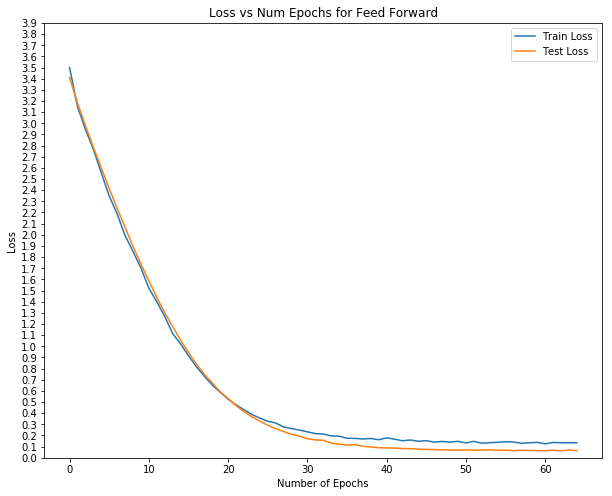

In [16]:
ProducePlot(ff_training_loss, ff_test_loss, 'Train Loss', 'Test Loss', 'Loss', 'Number of Epochs', 'Loss vs Num Epochs for Feed Forward', up=4)

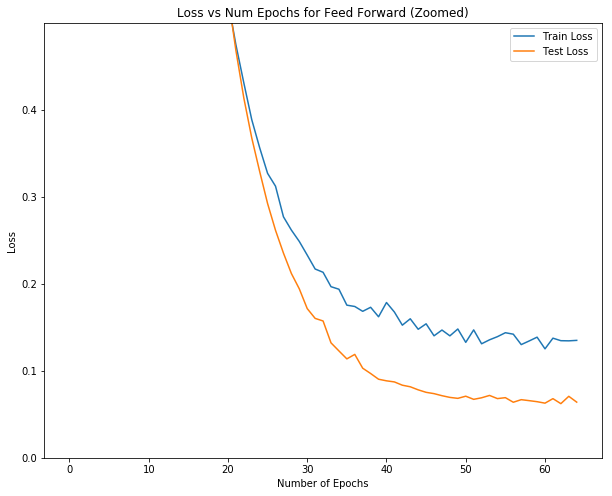

In [18]:
ProducePlot(ff_training_loss, ff_test_loss, 'Train Loss', 'Test Loss', 'Loss', 'Number of Epochs', 'Loss vs Num Epochs for Feed Forward (Zoomed)', up=0.5)

In [23]:
ff_test_auc_prepayment =  [0.55223574,
 0.55393749,
 0.58289752,
 0.57826302,
 0.59406274,
 0.5805796 ,
 0.59640076,
 0.59967505,
 0.61137663,
 0.60424795,
 0.60080932,
 0.60599802,
 0.58994409,
 0.58445154,
 0.60155069,
 0.61581125,
 0.61519044,
 0.60614361,
 0.58310709,
 0.58970694,
 0.59599615,
 0.58901914,
 0.59626975,
 0.59842623,
 0.59646585,
 0.59546309,
 0.6071103 ,
 0.61013502,
 0.60862177,
 0.60850454,
 0.60639062,
 0.59879542,
 0.59045921,
 0.60104762,
 0.62185395,
 0.61184227,
 0.59948473,
 0.61613482,
 0.60883606,
 0.60575256,
 0.61247365,
 0.60579636,
 0.60985158,
 0.62454441,
 0.60628784,
 0.59756375,
 0.60934349,
 0.60886002,
 0.60762084,
 0.60836858,
 0.60365965,
 0.61478946,
 0.62686246,
 0.61585679,
 0.62428901,
 0.61700011,
 0.61590293,
 0.62680669,
 0.62313953,
 0.61684885,
 0.61769861,
 0.62314852,
 0.60200721,
 0.61479571,
 0.60503432]


In [24]:
ff_training_auc_prepayment = [0.55544543,
 0.61264747,
 0.62605479,
 0.64215295,
 0.65865268,
 0.65212122,
 0.65839624,
 0.66115209,
 0.6701387 ,
 0.65056916,
 0.66537058,
 0.66350533,
 0.66473878,
 0.67050208,
 0.6771823 ,
 0.67333335,
 0.67155215,
 0.66625961,
 0.67296354,
 0.67589318,
 0.673025  ,
 0.66805409,
 0.66643909,
 0.67325172,
 0.67496645,
 0.67977888,
 0.67244692,
 0.67411597,
 0.68104027,
 0.68106036,
 0.68089206,
 0.6768579 ,
 0.67556645,
 0.67260723,
 0.68880601,
 0.68146799,
 0.68140432,
 0.68078051,
 0.68761833,
 0.67883087,
 0.69079036,
 0.68249445,
 0.68614123,
 0.68875562,
 0.68291221,
 0.68811872,
 0.68247525,
 0.6854311 ,
 0.68311287,
 0.68821807,
 0.68165159,
 0.69096704,
 0.68331584,
 0.68207907,
 0.67856716,
 0.69108809,
 0.69229357,
 0.68384912,
 0.68765275,
 0.68950412,
 0.68526588,
 0.6895745 ,
 0.69061595,
 0.69057572,
 0.69093437]


In [25]:
ff_test_auc_30dd = [0.50018987,
 0.54713424,
 0.57369591,
 0.59143762,
 0.58353518,
 0.61248827,
 0.61542181,
 0.63148964,
 0.62499961,
 0.6360665 ,
 0.64055426,
 0.65187262,
 0.6539595 ,
 0.66420092,
 0.66820222,
 0.67116005,
 0.68343114,
 0.68957344,
 0.67057839,
 0.68209578,
 0.68984592,
 0.68701748,
 0.69499035,
 0.69629433,
 0.6933747 ,
 0.6777053 ,
 0.69294795,
 0.6890957 ,
 0.69514611,
 0.70068343,
 0.68249913,
 0.69000772,
 0.68435514,
 0.69177773,
 0.70551158,
 0.7074561 ,
 0.70134059,
 0.7204895 ,
 0.71093182,
 0.71266352,
 0.71401291,
 0.7126706 ,
 0.71117482,
 0.70932981,
 0.71801661,
 0.71217317,
 0.70466474,
 0.71530595,
 0.70453962,
 0.71167094,
 0.68983286,
 0.71169275,
 0.72361695,
 0.71748417,
 0.70167506,
 0.71135929,
 0.71855419,
 0.71774679,
 0.7100304 ,
 0.71426063,
 0.71987935,
 0.7111188 ,
 0.71654522,
 0.70919291,
 0.71243357]

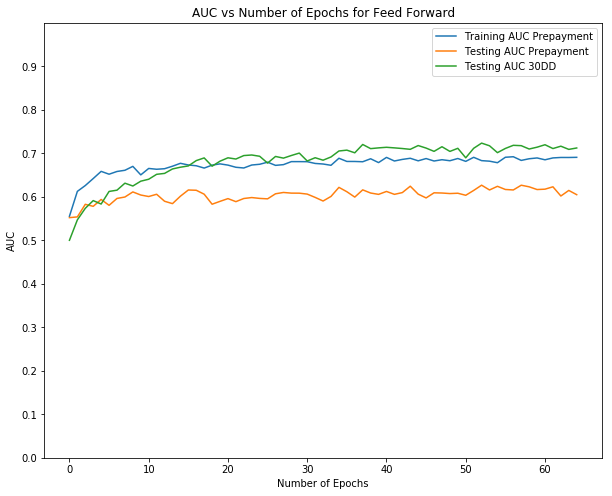

In [26]:
plt.figure(figsize=(10, 8))
p1 = plt.plot(ff_training_auc_prepayment)
p2 = plt.plot(ff_test_auc_prepayment)
p3 = plt.plot(ff_test_auc_30dd)
plt.ylim(0, 1)
plt.ylabel('AUC')
plt.xlabel('Number of Epochs')
plt.yticks(np.arange(0, 1, 0.1))
plt.legend(('Training AUC Prepayment', 'Testing AUC Prepayment', 'Testing AUC 30DD'))
plt.title('AUC vs Number of Epochs for Feed Forward')
plt.show()

**LSTM**

In [27]:
lstm_training_loss = [0.1462511146221827, 0.11899932886328814, 0.11759537409788125, 0.11876132000985277, 0.119849125165057, 0.11605873853619939, 0.11530518692956748, 0.1199879211966287, 0.10845978804102467, 0.1162263603233387, 0.1147927824550521, 0.12565550178848148, 0.12984007856907173, 0.11114857713616577, 0.12501872914895484, 0.11752553770644272, 0.12100548423856497, 0.11847774830050954, 0.11428688642626142, 0.10897608411911604, 0.11284208986609523, 0.10546235009350824, 0.1150330427040676, 0.11945263668502969, 0.12002586528295911, 0.11197815823114475, 0.11673359709037012, 0.10885915851062225, 0.117637997200874, 0.11419041258130581, 0.13485363102777362, 0.11769595464311505, 0.11767569847809554, 0.11799427457186695, 0.1210358682408595, 0.11416662051261418, 0.1164797511954878, 0.1213552923389077, 0.1169910695056621, 0.1260573399841173, 0.11831896260063961, 0.11163675264919593, 0.10995999602828084, 0.11883282045686855, 0.11617595842597392, 0.11269136112608115, 0.11160682211608679, 0.11860167460527199, 0.11378789824934037, 0.11605904446369779]

lstm_test_loss = [0.054495459848153356, 0.05415605549967315, 0.053824922504569515, 0.05580905966122042, 0.055079632596930765, 0.05352600208883157, 0.05535869544238841, 0.052918153823901935, 0.05523610777000628, 0.05190040270899179, 0.05347875821822217, 0.05336102809991048, 0.05287022094248738, 0.05200395603142055, 0.05460728938525105, 0.0533701156540088, 0.052423872578265675, 0.052885607941032725, 0.05214013921517, 0.053624149934085825, 0.053649950795404716, 0.05424347719210052, 0.05168000510347672, 0.05221211144836606, 0.05252256700925294, 0.05274130370449691, 0.05140715511192269, 0.052108341412903575, 0.0526457153509309, 0.05186447701043302, 0.05053110480907816, 0.05258578791338171, 0.053252895488697924, 0.053266272419898036, 0.05178173903435998, 0.05180523819226487, 0.05280847881537057, 0.05168183581374264, 0.05311774643274925, 0.05042684018025377, 0.05211634831014247, 0.05201771480335004, 0.05317883561069481, 0.053301918337702425, 0.05196159053753804, 0.05267483093557146, 0.05212516575148942, 0.052449283593275754, 0.05311961240537634, 0.0527966024327674]


In [31]:
lstm_training_auc_prepayment = [0.64034954,
 0.67008473,
 0.68392602,
 0.68699085,
 0.6912465 ,
 0.70048074,
 0.69612354,
 0.70476044,
 0.70319894,
 0.70541165,
 0.71046061,
 0.71682213,
 0.72476198,
 0.7147416 ,
 0.71999589,
 0.71682563,
 0.72601941,
 0.71966076,
 0.71635182,
 0.71893446,
 0.72467255,
 0.71636928,
 0.72633209,
 0.72273231,
 0.7185383 ,
 0.7261204 ,
 0.72882361,
 0.72392049,
 0.7301789 ,
 0.72663101,
 0.73670961,
 0.73050968,
 0.73112371,
 0.72989626,
 0.72944693,
 0.73381027,
 0.7347207 ,
 0.73660221,
 0.73842121,
 0.74105795,
 0.73115031,
 0.72442664,
 0.73332887,
 0.73126637,
 0.72941238,
 0.73342835,
 0.72618154,
 0.73258383,
 0.73576196,
 0.73962491]


In [33]:
lstm_test_auc_prepayment = [0.60618187,
 0.59536912,
 0.60296101,
 0.61218599,
 0.61792464,
 0.62764494,
 0.63478751,
 0.63279233,
 0.62730942,
 0.64226866,
 0.64331983,
 0.64563128,
 0.63225357,
 0.64645903,
 0.64261555,
 0.64356922,
 0.64764396,
 0.64154975,
 0.64840211,
 0.644533  ,
 0.65273906,
 0.65434434,
 0.64885887,
 0.64794995,
 0.65448207,
 0.6513212 ,
 0.65283048,
 0.65930516,
 0.64755547,
 0.6573401 ,
 0.65361044,
 0.65215883,
 0.65230624,
 0.65529089,
 0.6528086 ,
 0.65220404,
 0.658218  ,
 0.65869642,
 0.65284618,
 0.65435354,
 0.65187921,
 0.64757905,
 0.65598905,
 0.65312709,
 0.66479651,
 0.65794692,
 0.65435605,
 0.65701479,
 0.65970708,
 0.65661861]


In [32]:
lstm_test_auc_30dd = [0.70857724,
 0.7389544 ,
 0.74603698,
 0.74630275,
 0.75363884,
 0.75974377,
 0.75986747,
 0.76056155,
 0.75655419,
 0.7638509 ,
 0.7741355 ,
 0.78107005,
 0.7881182 ,
 0.7755428 ,
 0.78525907,
 0.78389692,
 0.78696802,
 0.78578859,
 0.7885975 ,
 0.7872865 ,
 0.79440084,
 0.78749875,
 0.79007079,
 0.79756595,
 0.80455461,
 0.79174486,
 0.80060453,
 0.79752937,
 0.80869124,
 0.80301656,
 0.81262477,
 0.80602893,
 0.80837122,
 0.80585567,
 0.80928105,
 0.80081053,
 0.79822797,
 0.80409635,
 0.80752852,
 0.81282434,
 0.8018406 ,
 0.80612123,
 0.80213449,
 0.80403092,
 0.80725569,
 0.80523251,
 0.80524207,
 0.8107238 ,
 0.80148481,
 0.81019867]


New Data

In [23]:
lstm_training_loss = [0.26426626789664465, 0.27965705407987207, 0.29825076266238676, 0.2567504958587392, 0.2748621722307885, 0.2695986859586021, 0.2725566373324961, 0.30590349565991765, 0.2545008751992591, 0.2510992653926612, 0.3088418414249418, 0.2616711834456488, 0.2562749346319687, 0.2784109570912529, 0.2938065868733136, 0.25812549554353903, 0.2845058586498995, 0.2628656903594177, 0.2731045126750895, 0.2702327077018383, 0.2722067333495996, 0.31471783671944614, 0.2227494834748839, 0.27849494668690616, 0.2777495618091283, 0.26820115031469527, 0.2817463525033628, 0.2542321424625061, 0.24101215197134251, 0.2664955683292375, 0.2737588335885431, 0.2940348814169585, 0.29153380538616536, 0.25572819224910626, 0.2626812494340225, 0.25785638366251196, 0.29332403058770296, 0.23723065542821098, 0.3002145788071709, 0.2904394468985855]
lstm_test_loss =  [7.3078147646359035, 2.3997042501797634, 2.6049586202709802, 2.3153132724855094, 2.4759011594099656, 5.697415573948196, 2.723221603341933, 2.45020132901147, 4.72939276500472, 2.6613390830584933, 4.198586613328329, 2.4032189915821487, 5.6459864771898305, 2.6579117067291267, 2.5893929540911422, 2.321959076287624, 2.4694791239673006, 2.2928278576848764, 2.356814337179863, 3.542446414987956, 3.558761513464685, 2.2991204335946325, 2.277519578529256, 4.51372570286904, 2.394986251003242, 4.0202817080116695, 2.5790924711744965, 2.508771004240428, 3.5851562372834556, 4.191707374307194, 3.7381689682922192, 2.4958083557949533, 4.046390480085143, 2.41479454440863, 2.2762369018397295, 4.440462930279651, 4.8005907729534165, 2.316657935122494, 2.439382191456056, 5.408605079959546]
lstm_test_loss = [i*0.1 for i in lstm_test_loss]

In [28]:
lstm_training_auc_prepayment = [0.62581314,
0.72552217,
0.767028  ,
0.78260969,
0.8236916 ,
0.84643264,
0.86933723,
0.85846922,
0.88159698,
0.90457751,
0.91523609,
0.89505488,
0.89982181,
0.91754266,
0.88841567,
0.92524899,
0.92324824,
0.90469764,
0.87259918,
0.83178196,
0.91314482,
0.87012323,
0.91959469,
0.91396288,
0.90407427,
0.91465164,
0.91775294,
0.91997877,
0.92271593,
0.92458706,
0.92046597,
0.92014852,
0.91924657,
0.89477239,
0.9130113 ,
0.89828548,
0.92403047,
0.90360879,
0.91929894,
0.89751087]

In [24]:
lstm_test_auc_prepayment = [0.59221244,
0.51525719,
0.66046156,
0.60282406,
0.73450915,
0.64517929,
0.69740155,
0.69614298,
0.70805625,
0.76943531,
0.76921824,
0.74568741,
0.74576271,
0.76929624,
0.74256626,
0.74422494,
0.74577517,
0.69238435,
0.69548095,
0.68770856,
0.76670615,
0.74560829,
0.74577595,
0.74336181,
0.74164206,
0.74342745,
0.6954948 ,
0.76955362,
0.74576394,
0.706372  ,
0.74577022,
0.76955193,
0.74576103,
0.74191719,
0.74499695,
0.76826965,
0.7695158 ,
0.74525785,
0.74547772,
0.73873476]


In [25]:
lstm_test_auc_30dd = [0.57985329,
0.55729877,
0.52545168,
0.62281023,
0.65786189,
0.53972552,
0.63303224,
0.67043019,
0.56647492,
0.66724085,
0.62375063,
0.71990172,
0.62332184,
0.71799603,
0.69210004,
0.70279609,
0.70436532,
0.66933979,
0.65702444,
0.56950758,
0.68136676,
0.74222144,
0.72001563,
0.63952311,
0.69740967,
0.65408782,
0.6638655 ,
0.65113381,
0.62335113,
0.60842059,
0.70058732,
0.70435856,
0.62335788,
0.70111247,
0.69852775,
0.64152194,
0.64236432,
0.71745883,
0.69824404,
0.61196489]


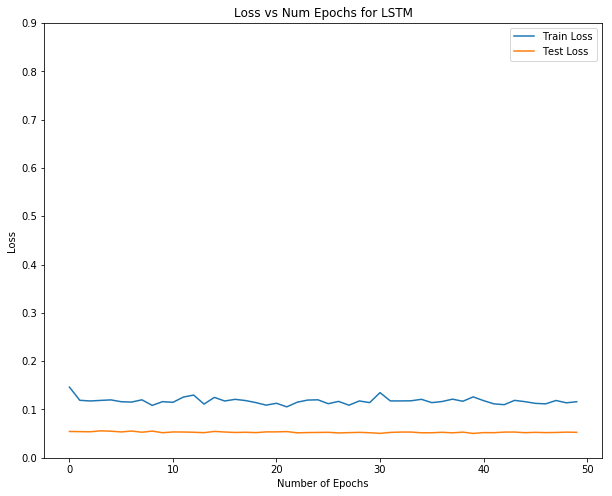

In [28]:
ProducePlot(lstm_training_loss, lstm_test_loss, 'Train Loss', 'Test Loss', 'Loss', 'Number of Epochs', 'Loss vs Num Epochs for LSTM')

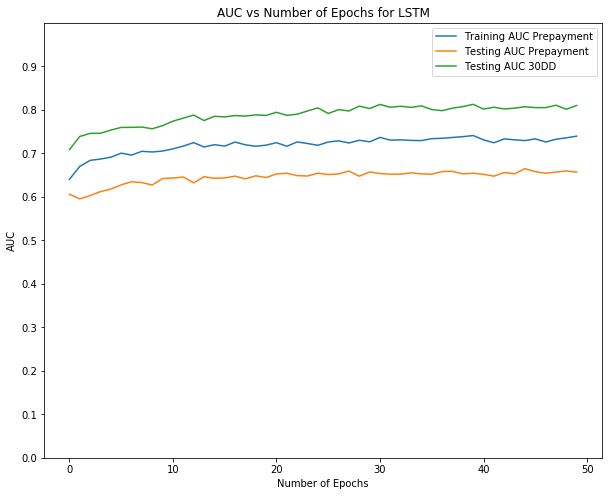

In [34]:
plt.figure(figsize=(10, 8))
p1 = plt.plot(lstm_training_auc_prepayment)
p2 = plt.plot(lstm_test_auc_prepayment)
p3 = plt.plot(lstm_test_auc_30dd)
plt.ylim(0, 1)
plt.ylabel('AUC')
plt.xlabel('Number of Epochs')
plt.yticks(np.arange(0, 1, 0.1))
plt.legend(('Training AUC Prepayment', 'Testing AUC Prepayment', 'Testing AUC 30DD'))
plt.title('AUC vs Number of Epochs for LSTM')
plt.show()

**Comparitive study of FF, LR and LSTM**

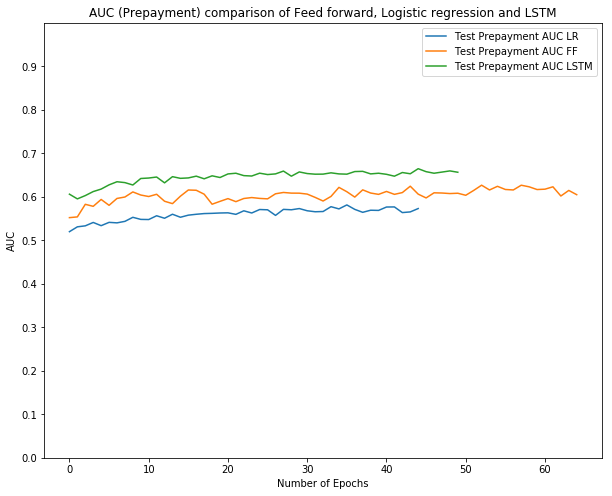

In [35]:
plt.figure(figsize=(10, 8))
p1 = plt.plot(auc_prepayment)
p2 = plt.plot(ff_test_auc_prepayment)
p3 = plt.plot(lstm_test_auc_prepayment)
plt.ylim(0, 1)
plt.ylabel('AUC')
plt.xlabel('Number of Epochs')
plt.yticks(np.arange(0, 1, 0.1))
plt.legend(('Test Prepayment AUC LR', 'Test Prepayment AUC FF', 'Test Prepayment AUC LSTM'))
plt.title('AUC (Prepayment) comparison of Feed forward, Logistic regression and LSTM')
plt.show()

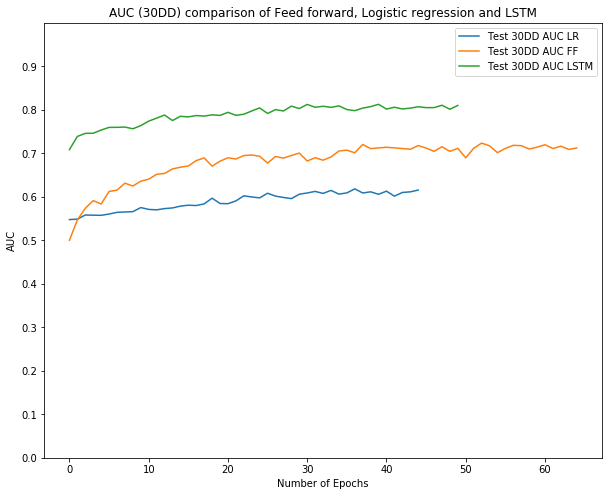

In [36]:
plt.figure(figsize=(10, 8))
p1 = plt.plot(auc_30d)
p2 = plt.plot(ff_test_auc_30dd)
p3 = plt.plot(lstm_test_auc_30dd)
plt.ylim(0, 1)
plt.ylabel('AUC')
plt.xlabel('Number of Epochs')
plt.yticks(np.arange(0, 1, 0.1))
plt.legend(('Test 30DD AUC LR', 'Test 30DD AUC FF', 'Test 30DD AUC LSTM'))
plt.title('AUC (30DD) comparison of Feed forward, Logistic regression and LSTM')
plt.show()

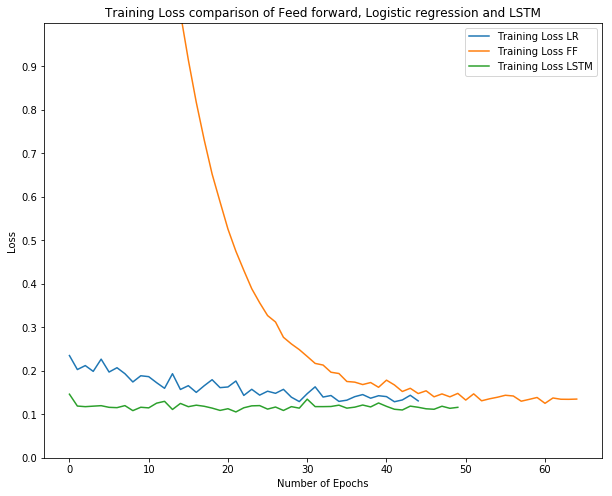

In [37]:
plt.figure(figsize=(10, 8))
p1 = plt.plot(train_loss_LR)
p2 = plt.plot(ff_training_loss)
p3 = plt.plot(lstm_training_loss)
plt.ylim(0, 1)
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.yticks(np.arange(0, 1, 0.1))
plt.legend(('Training Loss LR', 'Training Loss FF', 'Training Loss LSTM'))
plt.title('Training Loss comparison of Feed forward, Logistic regression and LSTM')
plt.show()

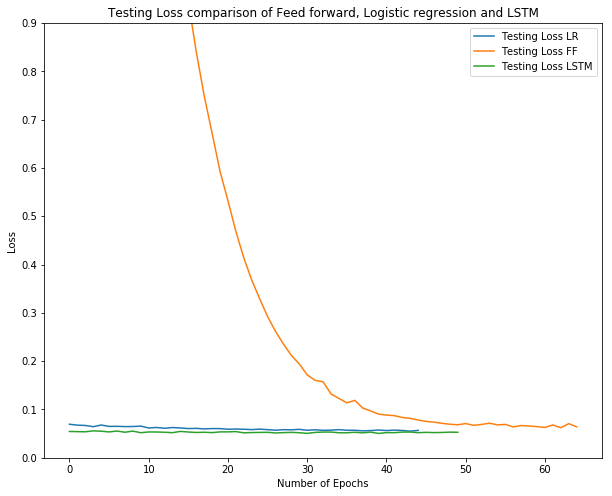

In [46]:
plt.figure(figsize=(10, 8))
p1 = plt.plot(test_loss_LR)
p2 = plt.plot(ff_test_loss)
p3 = plt.plot(lstm_test_loss)
plt.ylim(0, 0.5)
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.yticks(np.arange(0, 1, 0.1))
plt.legend(('Testing Loss LR', 'Testing Loss FF', 'Testing Loss LSTM'))
plt.title('Testing Loss comparison of Feed forward, Logistic regression and LSTM')
plt.show()

In [39]:
print("Max Prepayment AUC for LR: ", max(auc_prepayment))
print("Mean Prepayment AUC for LR: ", sum(auc_prepayment)/len(auc_prepayment))

Max Prepayment AUC for LR:  0.58147161
Mean Prepayment AUC for LR:  0.5597265308888889


In [40]:
print("Max Prepayment AUC for FF: ", max(ff_test_auc_prepayment))
print("Mean Prepayment AUC for FF: ", sum(ff_test_auc_prepayment)/len(ff_test_auc_prepayment))

Max Prepayment AUC for FF:  0.62686246
Mean Prepayment AUC for FF:  0.6038699839999998


In [41]:
print("Max Prepayment AUC for LSTM: ", max(lstm_test_auc_prepayment))
print("Mean Prepayment AUC for LSTM: ", sum(lstm_test_auc_prepayment)/len(lstm_test_auc_prepayment))

Max Prepayment AUC for LSTM:  0.66479651
Mean Prepayment AUC for LSTM:  0.6452727406000001


In [42]:
print("Max 30DD AUC for LR: ", max(auc_30d))
print("Mean 30DD AUC for LR: ", sum(auc_30d)/len(auc_30d))

Max 30DD AUC for LR:  0.61842846
Mean 30DD AUC for LR:  0.5897513517777777


In [43]:
print("Max 30DD AUC for FF: ", max(ff_test_auc_30dd))
print("Mean 30DD AUC for FF: ", sum(ff_test_auc_30dd)/len(ff_test_auc_30dd))

Max 30DD AUC for FF:  0.72361695
Mean 30DD AUC for FF:  0.6817723566153844


In [44]:
print("Max 30DD AUC for LSTM: ", max(lstm_test_auc_30dd))
print("Mean 30DD AUC for LSTM: ", sum(lstm_test_auc_30dd)/len(lstm_test_auc_30dd))

Max 30DD AUC for LSTM:  0.81282434
Mean 30DD AUC for LSTM:  0.7885268576
